<a href="https://colab.research.google.com/github/raphaelp-silva/Machine-Learning-Practitioner-bootcamp/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd


In [2]:
%load_ext tensorboard

In [3]:
logdir='log'

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=1,
            validation_data=(test_images, test_labels))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8938 - loss: 0.3412 - val_accuracy: 0.9835 - val_loss: 0.0543


In [9]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [10]:
classes=[0,1,2,3,4,5,6,7,8,9]

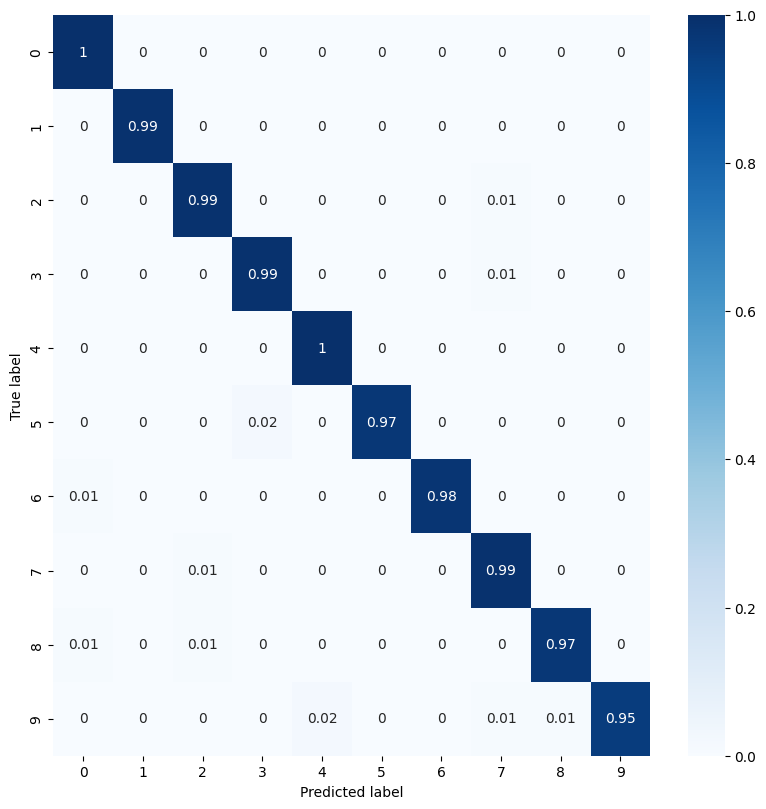

In [11]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
total_itens = con_mat.sum()
epsilon = 1e-9

FP = con_mat.sum(axis=0) - np.diag(con_mat)
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)

acuracia = (VP + VN) / (FP + FN + VP + VN)
sensibilidade = VP / (VP + FN + epsilon)
especificidade = VN / (VN + FP + epsilon)
precisao = VP / (VP + FP + epsilon)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade + epsilon)

print("Falsos Positivos: ", FP)
print("Falsos Negativos: ", FN)
print("Verdadeiros Positivos: ", VP)
print("Verdadeiros Negativos: ", VN)
print("\nAcuracia por classe: ", acuracia)
print("\nSensibilidade (Recall): ", sensibilidade)
print("\nEspecificidade: ", especificidade)
print("\nPrecisão: ", precisao)
print("\nF1-score: ", f_score)

print("\nAcurácia Total: ", np.diag(con_mat).sum() / total_itens)

Falsos Positivos:  [31  6 15 22 25 12  5 32 10  7]
Falsos Negativos:  [ 2  8 10 14  3 24 17 13 26 48]
Verdadeiros Positivos:  [ 978 1127 1022  996  979  868  941 1015  948  961]
Verdadeiros Negativos:  [8989 8859 8953 8968 8993 9096 9037 8940 9016 8984]

Acuracia por classe:  [0.9967 0.9986 0.9975 0.9964 0.9972 0.9964 0.9978 0.9955 0.9964 0.9945]

Sensibilidade (Recall):  [0.99795918 0.99295154 0.99031008 0.98613861 0.99694501 0.97309417
 0.9822547  0.98735409 0.97330595 0.95242815]

Especificidade:  [0.99656319 0.99932318 0.99832739 0.99755284 0.99722777 0.99868248
 0.99944702 0.99643335 0.99889209 0.99922144]

Precisão:  [0.96927651 0.99470432 0.9855352  0.978389   0.9750996  0.98636364
 0.99471459 0.96943649 0.98956159 0.9927686 ]

F1-score:  [0.98340875 0.99382716 0.98791687 0.98224852 0.98590131 0.97968397
 0.98844538 0.97831325 0.98136646 0.97218007]

Acurácia Total:  0.9835
